<a href="https://colab.research.google.com/github/jerge/DAT405-DSC/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Download Some Data Related to GDP per capita and life expectancy


### Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [1p]

We decided that we only wanted to use data from one year, since subsequent years would be similar and we did not want to clutter the plot. Furthermore we assumed that each country would have a similar GDP / Life expectancy ratio and thus it would be sufficient to plot only one point per country to see a trend (since we had many countries data). 

Plotting the same country multiple times could make it hard to compare them to each other, which seemed to be useful in order to answer the later questions.

We chose 2015, since we had the most data from that year.

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
ALB,Albania,2015,32826175488,10970.452245,78.025
DZA,Algeria,2015,481546174464,13724.723853,76.090
AGO,Angola,2015,154071351296,6227.664689,59.398
ATG,Antigua and Barbuda,2015,943836736,20154.947488,76.483
ARG,Argentina,2015,712662646784,19116.907915,76.068
...,...,...,...,...,...
UZB,Uzbekistan,2015,283167719424,5700.236028,70.928
VNM,Vietnam,2015,511142723584,5554.858056,75.110
YEM,Yemen,2015,67136618496,2308.636584,66.085


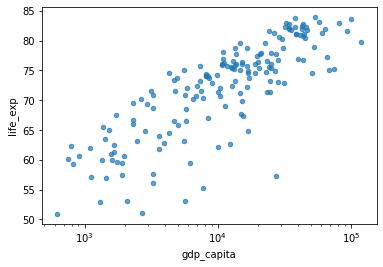

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

GdpPerCap = pd.read_csv("/content/drive/My Drive/DAT405/gdp-per-capita-worldbank.csv")
LifeExpect = pd.read_csv("/content/drive/My Drive/DAT405/life-expectancy.csv")
NatGdp = pd.read_csv("/content/drive/My Drive/DAT405/national-gdp.csv")

# Data merging & cleaning
countries = NatGdp.merge(GdpPerCap).merge(LifeExpect)
countries = countries[countries.Year == 2015]

countries = countries.set_index("Code")
countries.columns= ["country","year","gdp","gdp_capita", "life_exp"]

countries.plot.scatter(x="gdp_capita",y="life_exp",logx=True, alpha=0.7)

countries

### Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained. [1p]


The trend seems to be a logarithmic curve with a few outliers. In a richer country the life expectancy increases, which makes sense. If we assume a richer country has a higher GDP per Capita the people in that country should be able to afford all their basic needs and as such avoid starvation and health deficits related to bad food, water and hygien. Further wealth contributes to health care and medicine, but after a certain point there is a diminishing return on how much wealth impacts the life expectancy.

Almost all outliers are a result of the country being pretty poor and then finding oil, resulting in a huge boost in the economy, which has not had the time needed to positively affect the public health. Furthermore the wealth is probably not distributed properly, since the people owning oil is probably just a small percentage of the population.

### Data Cleaning and Why?
* Data from 2015
Se 1.a
* Länder som inte har data punkter för alla columner
To make a fair comparison between all the questions in #1 we figured it would require that we compared the same countries every time.
* Medelvärdes entries, ex. World fanns med
In our data there where also some points which contained averages, such as the "World" or "Africa", while these probably would have followed the trend, we decided that would not contribute properly and as such they where removed. (When we merged the plots on "Code")

###Which countries have a life expectancy higher than one standard deviation above the mean?


,country,year,gdp,gdp_capita,life_exp
Code,,,,,
AUS,Australia,2015,1066969268224,43923.258269,82.794
AUT,Austria,2015,387296296960,44304.967757,81.182
BEL,Belgium,2015,417381416960,41708.212340,80.969
CAN,Canada,2015,1518240006144,43149.475837,82.026
CYP,Cyprus,2015,23035398144,30549.100970,80.350
DNK,Denmark,2015,243726254080,45458.697149,80.475
FIN,Finland,2015,206622720000,38941.763603,81.196
FRA,France,2015,2520561483776,37766.374112,82.224
DEU,Germany,2015,3634567053312,43937.947132,80.770


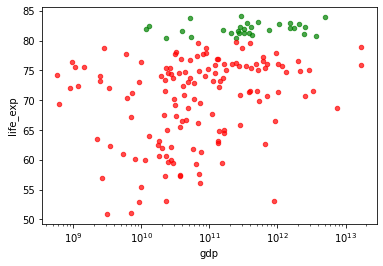

In [4]:
#d
stdevs = countries.std(axis = 0)
means = countries.mean(axis = 0)
highLifeExp = countries[countries.life_exp > stdevs.life_exp + means.life_exp]
lowLifeExp = countries[countries.life_exp <= stdevs.life_exp + means.life_exp]

fig, ax = plt.subplots()
highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7,logx=True, ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7,logx=True, ax=ax, color='r')

highLifeExp

See the green points in the plot or the list for all countries that have a life expectancy higher than one standard deviation above the mean (~80.05)

### Which countries have high life expectancy but have low GDP?

,country,year,gdp,gdp_capita,life_exp
Code,,,,,
BRB,Barbados,2015,2807180544,16458.103529,78.801
CYP,Cyprus,2015,23035398144,30549.100970,80.350
ISL,Iceland,2015,13045315584,43048.125145,82.481
MLT,Malta,2015,11749704704,34087.081514,81.896


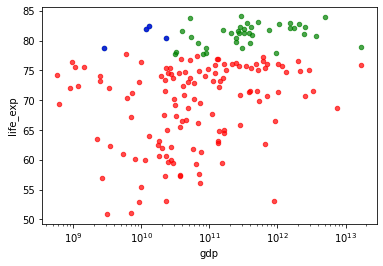

In [5]:
#e
fig, ax = plt.subplots()
highLifeExp = countries[countries.life_exp > countries.life_exp.quantile(0.75)]
lowLifeExp = countries[countries.life_exp <= countries.life_exp.quantile(0.75)]

highLifeExpLowGDP = highLifeExp[highLifeExp.gdp < countries.gdp.quantile(0.25)]
highLifeExpLowGDP #Finns inga länder som har GDP under mean och hög life exp

highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7, logx=True,ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='r')
highLifeExpLowGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='b')

highLifeExpLowGDP

In our data there is a lot of deviation in the GDP's. Therefore the standard deviation of the country is higher than the mean and as such it does not make sense to indicate low GDP by "X standard deviation below the mean" since just a single step above the mean would remove all countries from the plot. This could perhaps be solved by removing the oil countries and other outliers, but because of the logarithmic nature it would not be certain and furthermore it would make the comparison unfair, since we wouldn't have all countries.

Therefore we chose to indicate the low GDP as the bottom 25% of the samples and by that it followed that high life expectancy was indicated by the top 25% of the samples. These countries where the 4 Blue ones in the plot, Barbados, Cyprus, Iceland and Malta.

#Does every strong economy (normally indicated by GDP) have high life expectancy? 

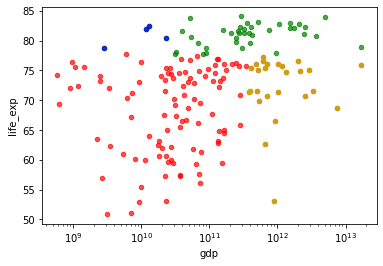

In [6]:
#e
fig, ax = plt.subplots()

lowLifeExpHighGDP = lowLifeExp[lowLifeExp.gdp >= countries.gdp.quantile(0.75)]

highLifeExp.plot.scatter(x="gdp",y="life_exp", alpha=0.7, logx=True,ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='r')
highLifeExpLowGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='b')
lowLifeExpHighGDP.plot.scatter(x="gdp",y="life_exp",alpha=0.7, logx=True,ax=ax, color='y')


From the above plot the yellow dots are the countries which has a strong economy, but a relatively low life expectancy. Since these are so many (26/169 ~ 15%) it would be unreasonable to say that a strong economy has a strong indication on the life expectancy.

### Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f

,year,gdp,gdp_capita,life_exp
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


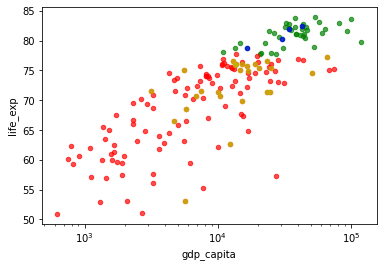

In [7]:
fig, ax = plt.subplots()

highLifeExpLowGDPcap = highLifeExp[highLifeExp.gdp_capita < countries.gdp_capita.quantile(0.25)]

highLifeExp.plot.scatter(x="gdp_capita",y="life_exp", alpha=0.7, logx=True,ax=ax, color='g')
lowLifeExp.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, logx=True,ax=ax, color='r')
highLifeExpLowGDP.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, logx=True,ax=ax, color='b')
lowLifeExpHighGDP.plot.scatter(x="gdp_capita",y="life_exp",alpha=0.7, logx=True,ax=ax, color='y')

highLifeExpLowGDPcap.describe()

GDP per capita is a much stronger indicator for strong economy. We can instantly see that there are no countries with a high life expectancy that has a low GDP per capita. Furthermore we see that the yellow countries from the previous plot, actually has a more reasonable GDP per capita and are much more entertwined with the other low life expectancy countries. Similarly the blue dots don't stick out as much. The reason for this is probably that GDP per capita factors in that being a smaller country doesn't result in a lower life expectancy.

# 2. Download some other data sets, e.g. related to happiness and life satisfaction, trust, corruption, etc

### a. Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.

First of all we wanted to check how money contributes to corruption, and one of the first things we thought of there was that the economic inequality probably was another big factor, since poorly distributed wealth should indicate that the country has less democracy. Furthermore we thought it relevant to include the relation between GDP per capita and the other variables.

**Data sets:**

All data sets where picked from a specific year with the highest amount of data points, which in this case was 2012. This data cleaning was done for the same reason as described in question 1.

* [Economic Inequality](https://ourworldindata.org/grapher/economic-inequality-gini-index?tab=table)

*Using the Gini index.*

* [Corruption](https://ourworldindata.org/grapher/TI-corruption-perception-index?tab=table)

*Measured as the perceived corruption by experts and opinion surverys. The indata however measures a low corruption with a high value, therefore we inverted the corruption to indicate that a high corruption puts the country further to the right.*

* [Life satisfaction](https://ourworldindata.org/grapher/happiness-cantril-ladder?tab=table)

*Measured in surveys by the 'Cantril Ladder' where each person is asked how close they are to their worst possible or best possible life, from 0 to 10. *

* [Gdp per capita](https://ourworldindata.org/grapher/gdp-per-capita-worldbank?tab=table)

*As a measure for the wealth in a country.*

_____________________

Questions we want to answer:

1. How much does corruption and economic inequality correlate?

2. How much is life satisfaction impacted by corruption and economic inequality?

3. How does a countries wealth impact the other variables?

Hypothesis:

1. We assume that countries with a higher corruption has a big part of their wealth owned by a fraction of the population. When a country has a very rich minority it seems likely that they have an incentive to affect the public sector to better fit their needs. Furthermore this probably works since the rest of the country does not have a lot of money and are thus more susceptible to bribes. This and similar stereotypes is the constitution for our hypothesis.

2. We believe that a high corruption and/or economic inequality would make people feel less satisfied with their lives. Higher levels of corruption could lead to the citizens feeling powerless in affecting their life and also lead them to think that their lives are unjust, which we assume leads to less satisfied lives. Higher levels of economic inequality should make large parts of the country comparatively poor. Being poor can result in people having a hard time surviving from day to day, which of course would be very stressful and lead to a life where you are not able to satisfy your desires. Futhermore since the economy is not just low, but it is inequally distributed, these poorer individuals will see how rich their upper-class is and strive towards that, thus not feeling satisfied with their lives.

3. We believe that wealth will have a definite impact on corruption and life satisfaction. We have the perception that wealthier countries generally have a more democratic rule, mostly since we know that most of the industrial countries are both wealthier and in large part has a democracy. Furthermore we believe that a democratic rules leaves less room for corruption. In regards to the economic inequality we do not think that the correlation will work for all cases, but the more democratic should be both wealthier and have a more equally distributed wealth due to our previous assessments. Finally the life satisfaction will correlate by extension of the other variables, i.e. in countries where the GDP per capita lowers the corruption and economic inequality will by extension of our other hypotheses result in a higher life satisfaction.


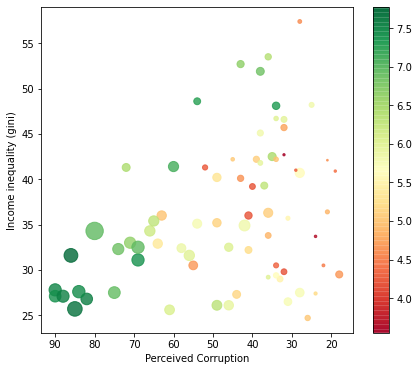

In [38]:
from sklearn import preprocessing

# Read data
incomeInEq = pd.read_csv("/content/drive/My Drive/DAT405/economic-inequality-gini-index.csv")
corruption = pd.read_csv("/content/drive/My Drive/DAT405/TI-corruption-perception-index.csv")
gdpCap = pd.read_csv("/content/drive/My Drive/DAT405/gdp-per-capita-worldbank.csv")
satisfaction = pd.read_csv("/content/drive/My Drive/DAT405/happiness-cantril-ladder.csv")

# Merge, data cleaning, set index
countries = incomeInEq.merge(corruption).merge(gdpCap).merge(satisfaction).set_index("Code")
countries.columns= ["country","year","gini","corruption","gdp_capita","satisfaction"]

# Data cleaning, choose year 2012
countries = countries[countries.year == 2012]

# Normalize GDP per capita
min_max_scaler = preprocessing.MinMaxScaler()
x = countries[['gdp_capita']].values.astype(float)
x_scaled = min_max_scaler.fit_transform(x)
# Increase to more readable values
norm_gdp_capita = (x_scaled+0.01)*300

# Plotting
plt.rcParams['figure.figsize'] = [1*7, 1*6]
fig, ax = plt.subplots()
countries.plot.scatter(x="corruption", y="gini", s=norm_gdp_capita,c=countries.satisfaction,cmap="RdYlGn", ax=ax, alpha=0.8)
ax.set_xlabel("Perceived Corruption")
ax.set_ylabel("Income inequality (gini)")

ax.invert_xaxis() # Flip the corruption to have high corruption be to the right

plt.show()

### b. Discuss any observations that you make, or insights obtained, from the data visualisations.

1. How much does corruption and economic inequality correlate?

The first thing we see in regards to the plot is that there is a surprising spread across the x and y axis, since almost every part of the field has some dots. The only part that does not have dots is the top left part, i.e. where there is low corruption but high inequality. Note also that this part of the plot seems to be linearly cut off from the rest. This seems to indicate that the corruption level sets the maximum economic inequality the country has, but we cannot predict where in the span it actually lies. An interesting observation from this is that a high corruption means that you have almost no clue as to where the economic inequality lies, but with a low corruption you can be quite certain you have a low economic inequality.

Therefore it seems that we were only partly correct in our hypothesis that a high corruption would result in a higher income inequality. It does seem that the average income inequality across all countries with similar corruption is higher, but the variation is very large.

2. How much is life satisfaction impacted by corruption and economic inequality?

The green dots generally follow the linear line where the economic inequality is as large as possible in relation to the corruption, which seems very weird. For example the dots with a gini of ~50 are greener than the countries with the same corruption but with lower gini. A trend that we can see however is that there are still a lot more red dots towards the higher corruption levels, indicating that the corruption does have an impact upon the life satisfaction. 

It might simply be the case that the dots around gini ~50 are outliers where the economic situation is very volatile, such as if a country just found oil. In that case there are a few people that get all the money from that oil, which increases the economic inequality, but that does not decrease the life satisfaction of the common citizen. Instead the common citizens will probably get more opportunities to get good jobs and a higher living standard because of all the opportunities the booming economy has on the country. Compared to their old lives they probably get a lot closer to their dreams of "living their best possible life".

3. How does a countries wealth impact the other variables?

(See plot below) The gdp per capita seems to be a pretty good indicator of a countries corruption, but it does have a few big outliers. In regards to life satisfaction, we see that there seems to be some relation between them, but not as pronounced as with corruption. However gdp per capita does not seem to be a particularly good indicator for the gini, besides the fact that a higher gdp per capita indicates that there is less room for the economic inequality to vary.
 

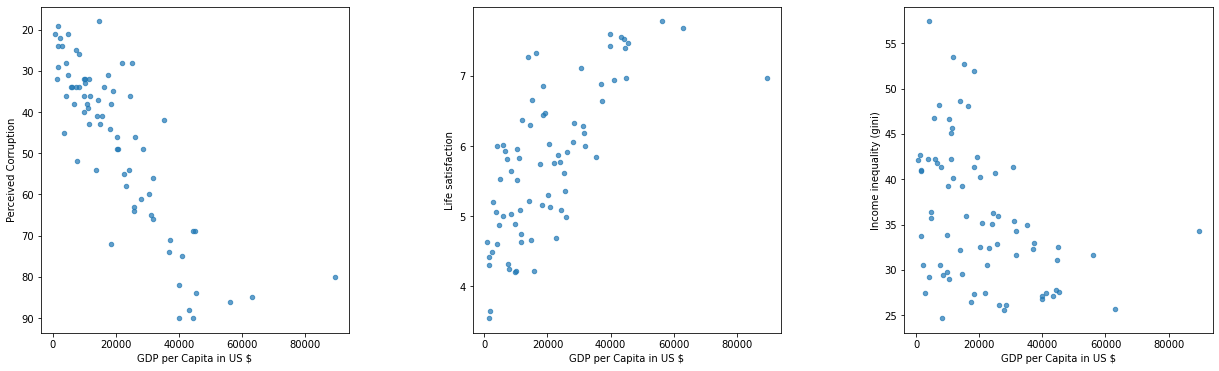

In [33]:
#Plotting
plt.rcParams['figure.figsize'] = [3*7, 1*6] #Resize figure to allow 2 subplots in x

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
countries.plot.scatter(x="gdp_capita",y="corruption", alpha=0.7, ax=ax1)
countries.plot.scatter(x="gdp_capita",y="satisfaction", alpha=0.7, ax=ax2)
countries.plot.scatter(x="gdp_capita",y="gini", alpha=0.7, ax=ax3)

plt.subplots_adjust(wspace=0.4)

ax1.set_xlabel("GDP per Capita in US $")
ax1.set_ylabel("Perceived Corruption")
ax2.set_xlabel("GDP per Capita in US $")
ax2.set_ylabel("Life satisfaction")
ax3.set_xlabel("GDP per Capita in US $")
ax3.set_ylabel("Income inequality (gini)")
ax1.invert_yaxis()
plt.show()